Project Title: MNIST Digit Classification using Keras

This project demonstrates how to build and train a deep learning model using Keras for classifying handwritten digits from the MNIST dataset. It also includes code for loading and pre-processing custom images for classification, using OpenCV for image manipulation.

1. Libraries and Dataset Loading:

In [26]:
import numpy as np
import matplotlib.pyplot as plt # plot the graph 
import keras
from keras.datasets import mnist # type: ignore
from keras.models import Sequential # type: ignore
from keras.layers import Dense # type: ignore
from keras.optimizers import Adam # type: ignore
from keras.utils import to_categorical # type: ignore

In [2]:
import random

In [3]:
np.random.seed(0)

2. load the dataset that is MNISTdataset which it conatins the 60000 to 10000 datasets 

In [15]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

3.  Data Validation and Visualization:
The code ensures that the data is correctly loaded and visualizes a subset of the dataset.
The assert statements check the consistency of the dataset (i.e., ensuring the number of images matches the number of labels and that the images are 28x28 pixels).

In [16]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels in training set."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels in test set."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28 in training set." 
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28 in test set."

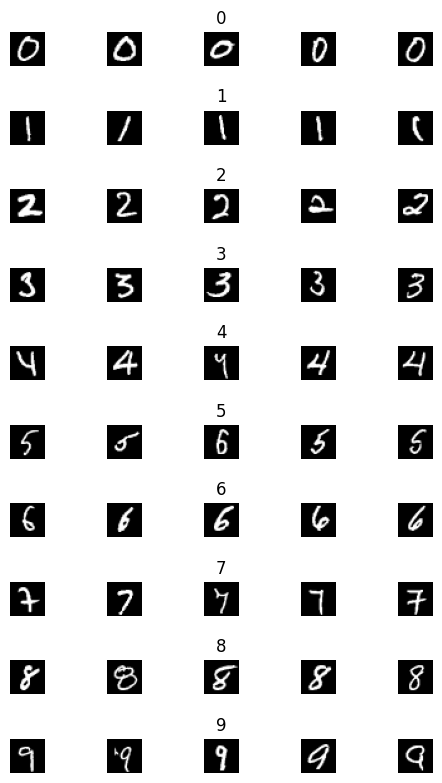

In [18]:
# This creates a grid of subplots to visualize random samples from each digit class.
n_cols=5
n_classes=10
num_of_samples=[]
fig, axis = plt.subplots(nrows=n_classes, ncols = n_cols, figsize=(5, 8))
fig.tight_layout()



for i in range(n_cols):
    for j in range(n_classes):
        x_selected = X_train[y_train==j]
        axis[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)),:,:,],cmap=plt.get_cmap("gray"))
        axis[j][i].axis("off")
        if i == 2:
            axis[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

    

3. Data Preprocessing:
Before feeding data into the model, the data needs to be scaled and transformed.
Normalization: Divides pixel values by 255 to scale them between 0 and 1 (as pixel values range from 0 to 255).
One-Hot Encoding: Converts labels into a one-hot encoded format, required for multi-class classification.

In [20]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train/255 
X_test = X_test/255

num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)


4. Model Architecture:

The neural network is built using the Sequential model in Keras.
Input Layer: 784 units (pixels) are passed as input to the model.
Hidden Layers: Two hidden layers with 30 and 10 units, both using the ReLU activation function.
Output Layer: The output layer has 10 units (for the 10 digit classes), with a softmax activation function to output probabilities.

Model Architecture:
Input Layer: 784 units (28x28 pixels flattened)
Hidden Layer 1: 10 units, ReLU activation
Hidden Layer 2: 30 units, ReLU activation
Hidden Layer 3: 10 units, ReLU activation
Output Layer: 10 units (for 10 digit classes), Softmax activation


In [23]:
model =Sequential ()
model.add(Dense(units=10,input_shape=(num_pixels,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='softmax'))


5. Model Compilation and Training:
The model is compiled and trained using the Adam optimizer.

In [24]:
model.compile(Adam(0.01),loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

Epoch 1/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6475 - loss: 1.0638 - val_accuracy: 0.8957 - val_loss: 0.3515
Epoch 2/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8932 - loss: 0.3753 - val_accuracy: 0.9187 - val_loss: 0.2842
Epoch 3/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9092 - loss: 0.3228 - val_accuracy: 0.9235 - val_loss: 0.2644
Epoch 4/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9129 - loss: 0.2992 - val_accuracy: 0.9317 - val_loss: 0.2380
Epoch 5/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9184 - loss: 0.2836 - val_accuracy: 0.9298 - val_loss: 0.2420
Epoch 6/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9200 - loss: 0.2730 - val_accuracy: 0.9332 - val_loss: 0.2331
Epoch 7/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9232 - loss: 0.2670 - val_accuracy: 0.9272 - val_loss: 0.2500
Epoch 8/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9239 - loss: 0.2569 - val_accuracy: 0.


6. Evaluation and Testing:
After training, the model is evaluated on the test set.

In [22]:
score=model.evaluate(X_test,y_test)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9342 - loss: 0.2324
<class 'list'>
Test score: 0.1926921159029007
Test accuracy: 0.9463000297546387


7. Custom Image Classification:
The model is used to classify a custom image loaded using OpenCV.

C:\Users\rashm\Desktop\py_dl\MNIST_digitclass_deepNN\2.png
(28, 28)


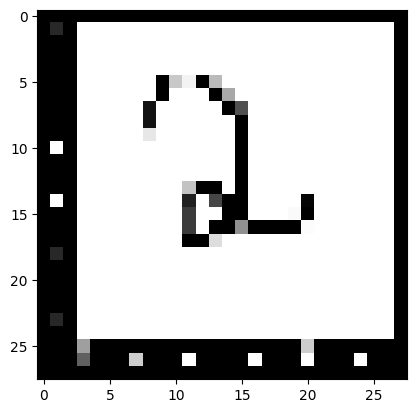

In [25]:
import cv2
import matplotlib.pyplot as plt
import os

imgpath = "C:\\Users\\rashm\\Desktop\\py_dl\\MNIST_digitclass_deepNN\\2.png"  # Ensure the correct path
print(os.path.abspath(imgpath))

img = cv2.imread(imgpath)
if img is None:
    print("Error: Image not found or cannot be loaded.")
else:
    img = cv2.resize(img, (28, 28))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.bitwise_not(img)
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    print(img.shape)


In [12]:
img = img/255
img = img.reshape(1, 784)

prediction = model.predict(img)
print("predicted digit:", str(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
predicted digit: [[2.6002029e-22 1.0215101e-15 3.0817479e-28 2.8631483e-11 1.9527610e-27
  9.9999976e-01 2.9703688e-07 0.0000000e+00 4.7445375e-10 2.5122081e-29]]


In [29]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.21106426417827606
Test accuracy: 0.9394000172615051
